In [2]:
import tensorflow as tf         #Importar Tensorflow
import matplotlib.pyplot as plt

print("Tensorflow version:", tf.__version__)#version de tensorflow

Tensorflow version: 2.17.0


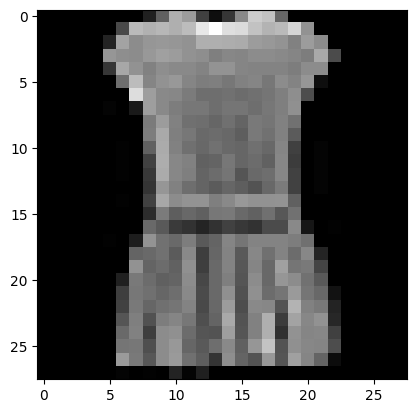

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#carga los datos de keras

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#divide el conjunto de datos en entrenamiento y prueba

x_train, x_test = x_train / 255.0, x_test / 255.0
#normaliza los valores de pixeles en 0 y 1

plt.imshow(x_train[3], cmap="gray")
#muestra la 4ta imagen del conjunto de datos en escala gris

In [21]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Convierte la entrada de imágenes 2D en un vector 1D.

    tf.keras.layers.Dense(256, activation='relu'),
    # Capa densamente conectada con 128 neuronas y ReLU.

    tf.keras.layers.Dropout(0.2),
    # Dropout para prevenir sobreajuste.

    tf.keras.layers.Dense(10)
    # Capa de salida con 10 neuronas
])

In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.9463076 ,  0.62773585, -0.16434813,  0.5982452 , -1.836092  ,
         0.12191734, -0.00596619,  0.13167721, -0.13763988, -0.07726053]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.20880269, 0.15183859, 0.06876768, 0.14742614, 0.01292276,
        0.09156045, 0.08056916, 0.09245845, 0.0706291 , 0.07502501]],
      dtype=float32)

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
y_train[y_train[:1]]

array([5], dtype=uint8)

In [27]:
loss_fn(y_train[:1], predictions).numpy()

2.5899336

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,),
              loss=loss_fn,
              metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7709 - loss: 0.6441
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8549 - loss: 0.3985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8675 - loss: 0.3561
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8783 - loss: 0.3313
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8831 - loss: 0.3144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8887 - loss: 0.3012
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8906 - loss: 0.2956
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8980 - loss: 0.2747
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8961 - loss: 0.2772
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9006 - loss: 0.2660


In [30]:
results = model.evaluate(x_test, y_test, verbose=2)
accuracy = results[1]
# Convierte a porcentaje
accuracy_percentage = accuracy * 100
# Imprime como porcentaje
print(f"Accuracy: {accuracy_percentage:.4f}%")

313/313 - 1s - 2ms/step - accuracy: 0.8846 - loss: 0.3268
Accuracy: 88.4600%


In [17]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [31]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.1322721e-08, 5.8057444e-11, 3.4815503e-12, 2.6221239e-12,
        1.5993731e-11, 1.8525116e-04, 1.6856909e-09, 5.9019588e-03,
        6.0109952e-11, 9.9391276e-01]], dtype=float32)>